# **"Momentum" Trading Strategy**


## **0. Introduccion Teorica:**

### **¿Qué es el Momentum?**

El momentum, se refiere a la capacidad de una tendencia de precios para mantenerse en el futuro. Es decir, es la velocidad a la que cambia el precio de una determinda accion o indice. El trading de momentum es una estrategia que busca capitalizar el impulso para entrar en una tendencia a medida que gana fuerza.

En otros terminos, se refiere a la inercia de una tendencia de precios para continuar ya sea subiendo o bajando durante un período determinado, generalmente teniendo en cuenta tanto el precio como asi tambien el volumen de la accion. En el análisis técnico, el momentum se mide a menudo mediante un oscilador y se utiliza para ayudar a identificar tendencias.

### **Principales puntos a considerar:**

- El momentum indica a la capacidad de una tendencia de precios para mantenerse en el futuro.

- Un fuerte momentum puede continuar en una tendencia alcista o bajista, lo cual puede ser confirmado por cambios en el volumen de operaciones y otros indicadores técnicos.


- Las tendencias de precios nunca están garantizadas en el futuro.

## **1. Importar librerias:**

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install yfinance
import yfinance as yf
import datetime



## **2. Download data:**

* Yahoo Finance
* Trading System
* TSLA Stock 2023

In [40]:



# Descargar datos de TSLA
tsla = yf.download('TSLA')

# Eliminar columnas 'Adj Close' y 'Volume'
tsla.drop(columns=['Adj Close', 'Volume'], inplace=True)

# Filtrar los últimos 5 días del último año
end_date = datetime.datetime.now()
start_date = end_date - datetime.timedelta(days=365)

tsla_last_year = tsla[(tsla.index >= start_date) & (tsla.index <= end_date)]

# Mostrar los últimos 5 días del último año
print(tsla_last_year.tail())


[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close
Date                                                      
2023-12-11  242.740005  243.440002  237.449997  239.740005
2023-12-12  238.550003  238.990005  233.869995  237.009995
2023-12-13  234.190002  240.300003  228.199997  239.289993
2023-12-14  241.220001  253.880005  240.789993  251.050003
2023-12-15  251.210007  254.130005  248.300003  253.500000


In [32]:
tsla.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3391 entries, 2010-06-29 to 2023-12-15
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3391 non-null   float64
 1   High    3391 non-null   float64
 2   Low     3391 non-null   float64
 3   Close   3391 non-null   float64
dtypes: float64(4)
memory usage: 132.5 KB


## **3. Transformacion de Datos**
* Calcular señales basados en precio o indicador estadistico
* Se utiliza el indicador tecnico moving average crossover para generar señales
* Long/Short Stategy


### **Moving Averages**

In [33]:
# Descargar datos de TSLA para el último año
end_date = datetime.datetime.now()
start_date = end_date - datetime.timedelta(days=365)
tsla_last_year = yf.download('TSLA', start=start_date, end=end_date)

# Calcular medias móviles de 9 y 21 días
tsla_last_year['9-day'] = tsla_last_year['Close'].rolling(9).mean()
tsla_last_year['21-day'] = tsla_last_year['Close'].rolling(21).mean()

# Seleccionar un rango específico, por ejemplo, del índice 19 al 25
tsla_selected_range = tsla_last_year.iloc[19:26]

# Mostrar el DataFrame resultante
print(tsla_selected_range)

[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-18  136.559998  136.679993  127.010002  128.779999  128.779999   
2023-01-19  127.260002  129.990005  124.309998  127.169998  127.169998   
2023-01-20  128.679993  133.509995  127.349998  133.419998  133.419998   
2023-01-23  135.869995  145.380005  134.270004  143.750000  143.750000   
2023-01-24  143.000000  146.500000  141.100006  143.889999  143.889999   
2023-01-25  141.910004  146.410004  138.070007  144.429993  144.429993   
2023-01-26  159.970001  161.419998  154.759995  160.270004  160.270004   

               Volume       9-day      21-day  
Date                                           
2023-01-18  195680300  121.274444         NaN  
2023-01-19  170291900  123.144444  122.901428  
2023-01-20  138858100  125.406666  122.118095  
2023-01-23  203119200  1

### **Signal**  

In [34]:

# Calcular medias móviles de 9 y 21 días
tsla_last_year['9-day'] = tsla_last_year['Close'].rolling(9).mean()
tsla_last_year['21-day'] = tsla_last_year['Close'].rolling(21).mean()

# Agregar la columna de señales (signal column)
tsla_last_year['signal'] = np.where(tsla_last_year['9-day'] > tsla_last_year['21-day'], 1, 0)
tsla_last_year['signal'] = np.where(tsla_last_year['9-day'] < tsla_last_year['21-day'], -1, tsla_last_year['signal'])
print(tsla_last_year)


                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-12-19  154.000000  155.250000  145.820007  149.869995  149.869995   
2022-12-20  146.050003  148.470001  137.660004  137.800003  137.800003   
2022-12-21  139.339996  141.259995  135.889999  137.570007  137.570007   
2022-12-22  136.000000  136.630005  122.260002  125.349998  125.349998   
2022-12-23  126.370003  128.619995  121.019997  123.150002  123.150002   
...                ...         ...         ...         ...         ...   
2023-12-11  242.740005  243.440002  237.449997  239.740005  239.740005   
2023-12-12  238.550003  238.990005  233.869995  237.009995  237.009995   
2023-12-13  234.190002  240.300003  228.199997  239.289993  239.289993   
2023-12-14  241.220001  253.880005  240.789993  251.050003  251.050003   
2023-12-15  251.210007  254.130005  248.300003  253.500000  253.500000   

               Volume       9-day    

### **Calcular returns/system returns**

In [35]:
# Calcular el rendimiento logarítmico diario
tsla_last_year['return'] = np.log(tsla_last_year['Close']).diff()

# Calcular el rendimiento del sistema
tsla_last_year['system_return'] = tsla_last_year['signal'] * tsla_last_year['return']

# Identificar los puntos de entrada al sistema
tsla_last_year['entry'] = tsla_last_year['signal'].diff()

# Mostrar el DataFrame resultante
print(tsla_last_year.head())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-12-19  154.000000  155.250000  145.820007  149.869995  149.869995   
2022-12-20  146.050003  148.470001  137.660004  137.800003  137.800003   
2022-12-21  139.339996  141.259995  135.889999  137.570007  137.570007   
2022-12-22  136.000000  136.630005  122.260002  125.349998  125.349998   
2022-12-23  126.370003  128.619995  121.019997  123.150002  123.150002   

               Volume  9-day  21-day  signal    return  system_return  entry  
Date                                                                          
2022-12-19  139390600    NaN     NaN       0       NaN            NaN    NaN  
2022-12-20  159563300    NaN     NaN       0 -0.083965           -0.0    0.0  
2022-12-21  145417400    NaN     NaN       0 -0.001670           -0.0    0.0  
2022-12-22  210090300    NaN     NaN       0 -0.093023           -0.0    0.0  
2022-12

#### **Graficar Series de tiempo**

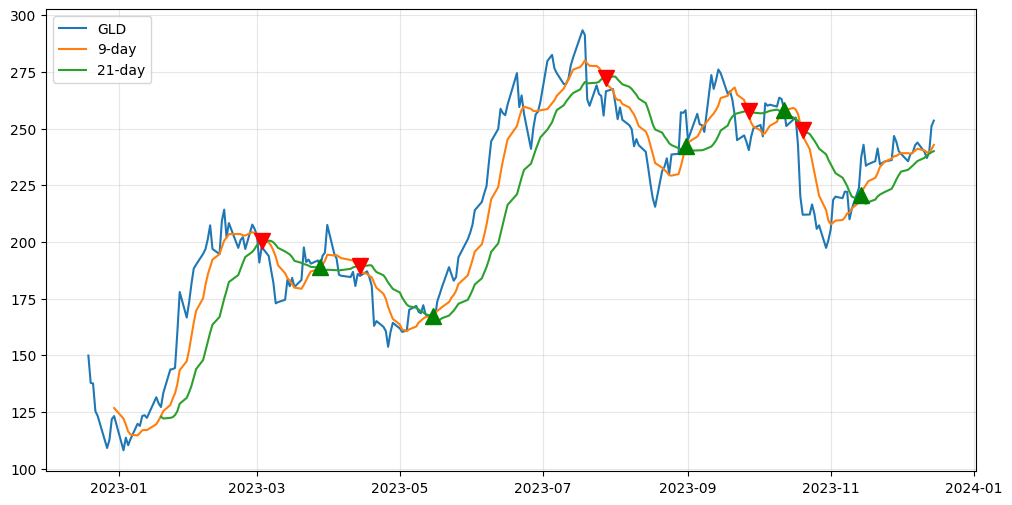

In [36]:
plt.rcParams['figure.figsize'] = 12, 6
plt.grid(True, alpha = .3)
plt.plot(tsla_last_year.iloc[-252:]['Close'], label = 'GLD')
plt.plot(tsla_last_year.iloc[-252:]['9-day'], label = '9-day')
plt.plot(tsla_last_year.iloc[-252:]['21-day'], label = '21-day')
plt.plot(tsla_last_year[-252:].loc[tsla_last_year.entry == 2].index, tsla_last_year[-252:]['9-day'][tsla_last_year.entry == 2], '^',
         color = 'g', markersize = 12)
plt.plot(tsla_last_year[-252:].loc[tsla_last_year.entry == -2].index, tsla_last_year[-252:]['21-day'][tsla_last_year.entry == -2], 'v',
         color = 'r', markersize = 12)
plt.legend(loc=2);

### **System Return**

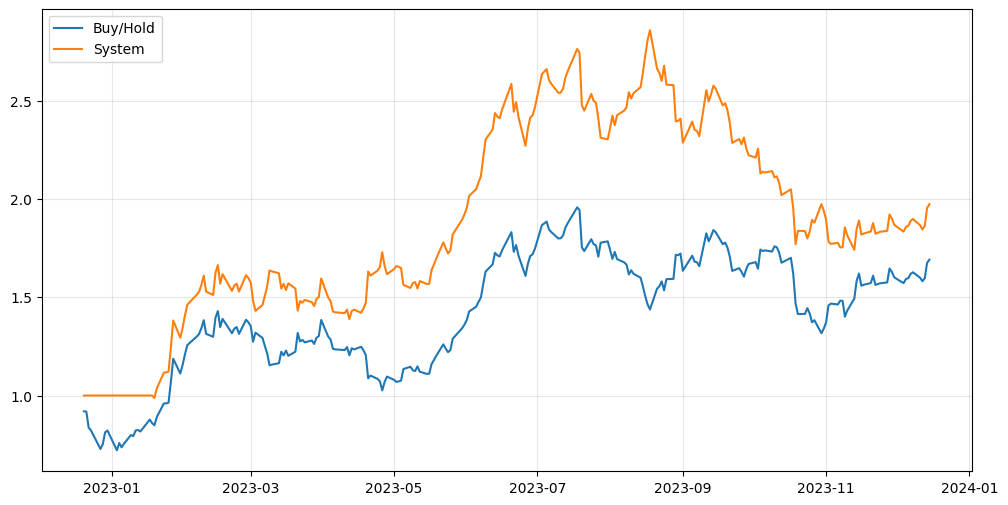

In [37]:
plt.plot(np.exp(tsla_last_year['return']).cumprod(), label='Buy/Hold')
plt.plot(np.exp(tsla_last_year['system_return']).cumprod(), label='System')
plt.legend(loc=2)
plt.grid(True, alpha=.3)

In [38]:
np.exp(tsla_last_year['return']).cumprod()[-1] -1

0.6914659922540296

In [39]:
np.exp(tsla_last_year['system_return']).cumprod()[-1] -1

0.9735438058105248